## COGS 108 - Final Project

## Overview

Applications are continuing to grow as a highly profitable market as they are now ubiquitous in daily life; and therefore, our project is impactful for current app developers and those considering entering the market of app development. Our project looked at a Google Playstore dataset to determine if the success of an application could be determined from its key features. We compared the apps’ category, byte size, rating, and number of reviews within and between each tier of success. We used this information to model how these features contribute to an app being highly successful, somewhat successful, or unsuccessful. 


## Names

- Zhixian Chen
- Fan Ding
- Kara Dolan
- Adhithi Raghavan
- Severine Soltani
- Zixuan Wang


## Group Members IDs

- A13680919
- A15712741
- A13073218
- A12861797
- A13776341
- U08244710


## Research Question

Can we predict if a free application is highly successful, somewhat successful, or unsuccessful based on its size, category, rating, and number of reviews?  We are operationally defining success as number of installs and are creating three possible tiers of success that an application can fall into.


## Background and Prior Work

When deciding on a research question, our group began by considering what we all had previous knowledge about. After debating a number of topics, we decided to use WhatsApp (a popular messaging application) to further discuss our ideas. According to the Pew Research Center, 77% of Americans own a smartphone as of 2018. This is up from 35% just 7 years ago in 2011. Therefore, smartphone applications are now used daily in the majority of households in America and this level of importance caused our group to want to discover more about applications. We realized that each of the 6 members of our group have a smartphone and are familiar with WhatsApp. We then wondered what made this app so successful, compared to a less successful app. The mobile app market is an increasingly lucrative market that no one can ignore. According to a Stanford research paper on the success of an application by Cameron Tuckerman, “Mobile applications have turned into an enormously profitable business, with revenue from mobile applications expected to exceed fifty billion USD by 2016. These profits are not distributed equally amongst developers, with forty-seven percent of developers making less than one-hundred USD, more than half of which make nothing at all; creating a successful application is not easy” (Tuckerman).  It is essential for app developers looking to turn a profit to know which factors can contribute to the success of their application. This led us to our ultimate research hypothesis that we would be able to predict the success of an application based on factors like the size, rating, category, and number of reviews of the app. 


Yahoo's Flurry analytics report that US 90% of consumer's mobile time is spent in apps and “the 2018 State of app usage report shows that mobile app usage is growing 6% Year-on-year” (https://buildfire.com/app-statistics/). App creators know the importance of number of installs for the success of their application. According to Business Insider, “The challenge of marketing an app effectively has made app-install ads — an ad unit that directs users to download a mobile app — an essential tool for developers seeking to stand out in the Google Play and Apple app stores. This is why it's not surprising that more marketers are using paid channels to drive downloads than ever before. In fact, over 80% of respondents in a survey of the top 100 grossing mobile app developers noted they plan on increasing their spend on app-install ads in 2015”.  Number of installs is a clear measure of success for apps, and when you have a successful app, other companies want to pay to advertise within the successful app, thus leading to greater income and success.


We chose to use only free applications to control for possible confounding variables that would come with including free and paid applications. These could include economic class differences between those who purchase apps and those who download free ones, number of installs that differ depending on price, and the price that needs to be factored in to the success of the app. Additionally, 93% of the data rows in the dataset are free apps. “In fact, 98% of app revenue worldwide comes from free apps” (buildfire.com). When holding price of the app constant, number of installs is the measure needed to determine the success of the app. Number of installs is a direct measure of the popularity of the app and correlates to the number of people completing in-app purchases and number of people seeing in-app advertisements.


References (include links):
- 1) https://www.pewinternet.org/fact-sheet/mobile/
- 2) https://www.businessinsider.com/mobile-app-install-add-report-2016-4-28?r=UK
- 3) http://cs229.stanford.edu/proj2014/Cameron%20Tuckerman,%20Predicting%20Mobile%20Application%20Success.pdf
- 4) https://buildfire.com/app-statistics/

## Hypothesis

The level of success of a free application, measured by number of downloads and split into three tiers (highly successful, somewhat successful, and unsuccessful), can be predicted by factors including byte size, rating, category, and number of reviews. With the amount of data available just for google play store applications, we believe that successful applications are more likely to share certain characteristics that are different from unsuccessful applications. We predict that there will be a statistically significant result, but are curious to see how strong the differences are between successful and less successful apps, and which factors carry the most weight.


## Dataset(s)

This dataset contains the information scraped from the Google Play Store, which includes 10,800 observations along with 13 columns. Each data row has the following columns: app, category, ratings, reviews, size, installs, type, price, content rating, genres, last updated, current version, and android version. We will be using 80% of the dataset randomly selected for training and 20% of the dataset randomly selected for testing.


- Dataset Name: Google Play Store Apps: googleplaystore.csv
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps 
- Number of observations total: 10,800
- Number of observations used: 7,150
- - Only using free applications, dropped NaN values, and dropped one ambiguous category.


# Setup

In [3]:
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from collections import defaultdict
import statistics 
from matplotlib import cm
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn

# Data Cleaning

In [4]:
data = pd.read_csv('./google-play-store-apps/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dropping Data

We went through all unique app categories and dropped one ambiguous category (named “1.9”). We replaced all “-” and “varies with device” values in the dataframe with “NaN” and dropped all samples containing an “NaN” value. We chose to drop data pertaining to the version of an app since version is not standardized. We also dropped the “genre” column in favor of using the “category” column due to the number of unique “genre” values being extremely extensive and the possibility of multiple genres applying to an app, which is not applicable to the “category” feature. We removed non-numeric values from the ‘Size’ category (e.g. “kB”, “MB”).


In [5]:
data = data.drop(['Current Ver', 'Android Ver', 'Genres'], axis=1)
data= data.replace('-', np.nan)
data= data.replace('Varies with device', np.nan)
data = data.dropna(axis=0, subset=['Type', 'Content Rating', 
                                   'Reviews', 'Size', 'Rating'])
data['Reviews'] = data['Reviews'].astype(str).astype(int)
data['Size'] = data['Size'].astype(str)

#### Cleaning Features
For preprocessing, we checked basic features such as the number of observations and opened the dataframe to see data in the columns and differences within columns. The size of the apps were in both kB and MB. We standardized the app sizes to all be in kilobytes by taking a subset of the data that includes only observations where size is in MB and multiplying the ‘Size’ column of this subset by 1000. We then merged this back with the remaining part of the dataframe which includes only kB data in order to get the full dataframe with the size all in kB. 


In [6]:
#standardize the app size
## Deal with app size in kilobytes: silce the original dataframe to
## include only apps that are in kilobytes. ##
## Strip "Size" column of letters, and convert string to float. ##
kilo = copy.deepcopy(data)
kilo = kilo[kilo['Size'].apply(lambda x: 'k' in x)]
kilo['Size'] = kilo['Size'].map(lambda x: x.rstrip('k')) 
kilo["Size"]= pd.to_numeric(kilo["Size"])

## Deal with app size in Megabytes: silce the original dataframe to
##include only apps that are in Megabytes. ##
## Strip "Size" column of letters, and convert string to float. ##
## Note: we are working with size in kilobytes, hence why the "Size" 
## column gets multiplied by 1000 ##
mega = copy.deepcopy(data)
mega = mega[mega['Size'].apply(lambda x: 'M' in x)]
mega['Size'] = mega['Size'].map(lambda x: x.rstrip('M')) 
mega["Size"]= pd.to_numeric(mega["Size"]) * 1000
    
## Stack the two above dataframes to get the full dataframe again ## 
frames = [kilo, mega]
data = pd.concat(frames)

Because the number of installs for an app was an estimated value (e.g. 100,000+), we floored the number of installs. Furthermore, we had to get rid of the commas present in the install values before we could convert the value in the ‘Installs’ column to a usable int. We also converted the ‘Reviews’ column to an int. The price of apps had to be stripped of symbols (e.g. “$”). 


In [7]:
## Deal with the "Installs" column: strip punctuation/symbols ##
## Since we have an estimate of the number of installs, we will
## floor the install values ##
data['Installs'] = data['Installs'].astype(str).map(lambda x: 
                                                    x.rstrip('+'))
data["Installs"] = pd.to_numeric(data["Installs"].str.
                                 replace(',', ''))

In [8]:
## Deal with the Price column: strip $
data['Price'] = pd.to_numeric(data['Price'].astype
                              (str).map(lambda x: x.lstrip('$'))) 
data = data[data["Price"] == 0]

We next dealt with the ‘Rating’ column. The ratings were recorded out of 5, but we wanted clean numbers that we could deal with as ints instead of floats. Therefore, we changed the ratings to be a percentage out of 100 by dividing the rating column by 5 and multiplying it by 100. This way, if the rating was a 5.0 (the maximum possible rating), it would be replaced with a 100. 


In [9]:
## Deal with the rating column: XX/100 instead X/5
data['Rating'] = data['Rating'].astype(float);
data['Rating'] = data['Rating']/5;
data['Rating'] = data['Rating']*100;

#### Added Features
CateNum: Each category name was given a number rather than its category name.

Success: Equivalent to the number of installs of an app; it is our measure of an app’s “success”.

SuccessLevel: Categorical variable that ranges from 1 to 3, with 1 being the most successful and 3 being the most successful. Category 1 represents the top 30% of success of apps, category 2 represents the middle 40% of success of apps, and category 3 represents the bottom 30% of success of apps.


The categories in the ‘Category’ column are given as strings, so we decided to give each category a specific number in order to work with the data easier. We created a new column in the dataframe “CateNum” which contained 33 numbers each assigned to a specific category name in the dataframe. 


In [10]:
## Numeric category
categories = data.Category.unique()
cateDict = defaultdict(int)
for i in range(len(categories)):
    cateDict[categories[i]] = i
    
cateNum = []
for c in data["Category"]:
    cateNum.append(cateDict[c])
    
data = data.assign(CateNum = cateNum)

We then made a ‘Success’ column that is defined by number of installs and we sorted the dataframe by ‘Success’ in descending order. We then created three dataframes each containing different tiers of success. The high success dataframe contains applications in the top 30% of all apps for number of installs. The medium success dataframe contains applications in the middle 30-70% range of number of installs. The low success dataframe contains applications that hold the bottom 30% of number of installs. We assigned success levels to each dataframe: the high success received level 1, the medium success received level 2, the low success received level 3. We added the column ‘SuccessLevel’, which stores each of these values for each observation, to our dataframe.


In [11]:
#add success category
data['Success'] = data['Installs']
df = copy.deepcopy(data)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,CateNum,Success
58,Restart Navigator,AUTO_AND_VEHICLES,80.0,1403,201.0,100000,Free,0.0,Everyone,"August 26, 2014",0,100000
209,Plugin:AOT v5.0,BUSINESS,62.0,4034,23.0,100000,Free,0.0,Everyone,"September 11, 2015",1,100000
384,Hangouts Dialer - Call Phones,COMMUNICATION,80.0,122498,79.0,10000000,Free,0.0,Everyone,"September 2, 2015",2,10000000
450,Caller ID +,COMMUNICATION,80.0,9498,118.0,1000000,Free,0.0,Everyone,"June 7, 2016",2,1000000
458,GO Notifier,COMMUNICATION,84.0,124346,695.0,10000000,Free,0.0,Everyone,"July 6, 2014",2,10000000


In [12]:
#get the three dataframes
df_all_success = df.sort_values(by=['Success'], ascending=False)

#df containing apps in the TOP 30% range of number of installs.. 
#must have all info ie rating, byte size, etc still
df_success = df_all_success[:int(len(df_all_success)*0.3)]

#df containing apps in the middle 30-70% range of number of installs...
#must have all info ie rating, byte size, etc still
df_medium = df_all_success[int(len(df_all_success)*0.3): int
                           (len(df_all_success)*0.7)]
#df containing apps in the bottom 30% range of number of installs...
#must have all info ie rating, byte size, etc still
df_bottom = df_all_success[int(len(df_all_success)*0.7):]

df_all_success.reset_index(drop=True,inplace=True)
df_success.reset_index(drop=True,inplace=True)
df_medium.reset_index(drop=True,inplace=True)
df_bottom.reset_index(drop=True,inplace=True)


In [13]:
df_success = df_success.assign(SuccessLevel = 1)
df_medium = df_medium.assign(SuccessLevel = 2)
df_bottom = df_bottom.assign(SuccessLevel = 3)

data = pd.concat([df_success, df_medium, df_bottom])
data_shuffle = shuffle(data)
data.reset_index(drop=True,inplace=True)
data_shuffle.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,CateNum,Success,SuccessLevel
1627,Chick-fil-A,FOOD_AND_DRINK,86.0,28009,17000.0,5000000,Free,0.0,Everyone,"August 3, 2018",30,5000000,1
198,Hungry Shark Evolution,GAME,90.0,6074334,100000.0,100000000,Free,0.0,Teen,"July 25, 2018",20,100000000,1
599,M-Files,BUSINESS,88.0,236,44000.0,10000,Free,0.0,Everyone,"June 26, 2018",1,10000,3
2181,Zombie War Z : Hero Survival Rules,GAME,78.0,1987,62000.0,100000,Free,0.0,Mature 17+,"December 13, 2017",20,100000,2
1983,"FastMeet: Chat, Dating, Love",DATING,84.0,22545,5900.0,1000000,Free,0.0,Mature 17+,"July 27, 2018",28,1000000,1


# Data Analysis & Results

## The whole dataset

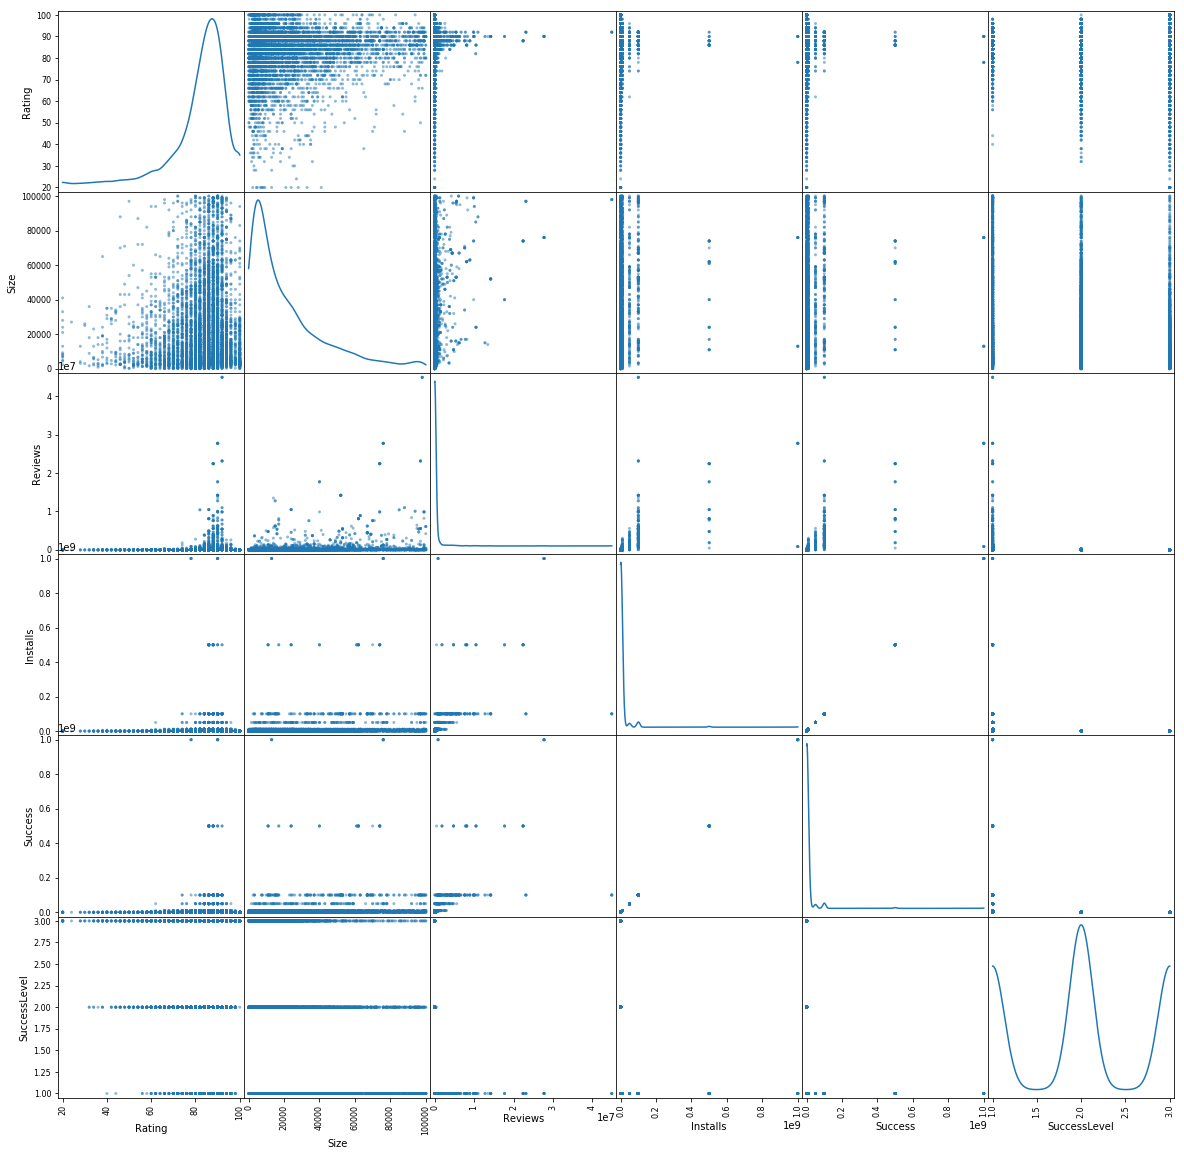

In [14]:
data_for_scattermx = data[['Rating','Size', "Reviews", 
                           "Installs", "Success", "SuccessLevel"]]
pd.plotting.scatter_matrix(data_for_scattermx,
                           figsize=(20, 20), diagonal='kde')
plt.show()

#### Scatter Matrix
This shows the relationship between variables rating, size, reviews, installs, success, and successlevel as scatter plots. This was used as a starting point for us to begin to spot possible correlations between variables, efficiently. 


In [15]:
data.describe()

,Rating,Reviews,Size,Installs,Price,CateNum,Success,SuccessLevel
count,7150.000000,7.150000e+03,7150.000000,7.150000e+03,7150.0,7150.000000,7.150000e+03,7150.000000
mean,83.349371,3.179667e+05,23146.775734,9.092723e+06,0.0,13.733566,9.092723e+06,2.000000
std,10.864063,1.935322e+06,23498.675596,5.207076e+07,0.0,7.493061,5.207076e+07,0.774651
min,20.000000,1.000000e+00,8.500000,1.000000e+00,0.0,0.000000,1.000000e+00,1.000000
25%,80.000000,1.260000e+02,5400.000000,1.000000e+04,0.0,9.000000,1.000000e+04,1.000000
50%,86.000000,3.091000e+03,14000.000000,1.000000e+05,0.0,11.000000,1.000000e+05,2.000000
75%,90.000000,4.607050e+04,33000.000000,1.000000e+06,0.0,20.000000,1.000000e+06,3.000000
max,100.000000,4.489389e+07,100000.000000,1.000000e+09,0.0,32.000000,1.000000e+09,3.000000


In [16]:
data = data.drop(['Price'], axis=1)
data.corr()

,Rating,Reviews,Size,Installs,CateNum,Success,SuccessLevel
Rating,1.000000,0.085049,0.082288,0.056983,0.017638,0.056983,-0.127450
Reviews,0.085049,1.000000,0.248152,0.625419,0.058462,0.625419,-0.208818
Size,0.082288,0.248152,1.000000,0.167554,0.152851,0.167554,-0.313675
Installs,0.056983,0.625419,0.167554,1.000000,0.046941,1.000000,-0.221084
CateNum,0.017638,0.058462,0.152851,0.046941,1.000000,0.046941,-0.126204
Success,0.056983,0.625419,0.167554,1.000000,0.046941,1.000000,-0.221084
SuccessLevel,-0.127450,-0.208818,-0.313675,-0.221084,-0.126204,-0.221084,1.000000


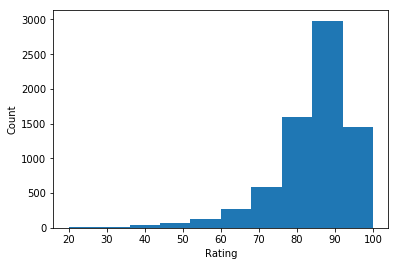

In [17]:
plt.xlabel('Rating')
plt.ylabel('Count')
rating_info = plt.hist(data['Rating'])

#### Rating
takes on a normal distribution that is skewed to the left, meaning that the value of the mean is less than the median.


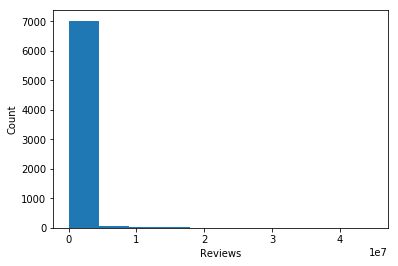

In [18]:
plt.xlabel('Reviews')
plt.ylabel('Count')
rating_info = plt.hist(data['Reviews'])

#### Reviews
takes on an extremely leftward skewed normal distribution and looks like an exponential distribution.


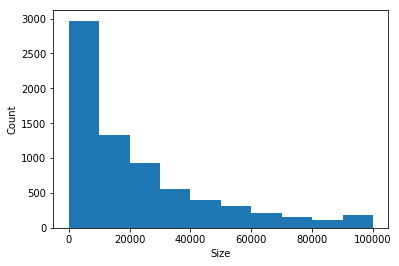

In [19]:
plt.xlabel('Size')
plt.ylabel('Count')
rating_info = plt.hist(data['Size'])

#### Size
takes on an exponential distribution, with mean to be 23146 and standard deviation to be 23498.


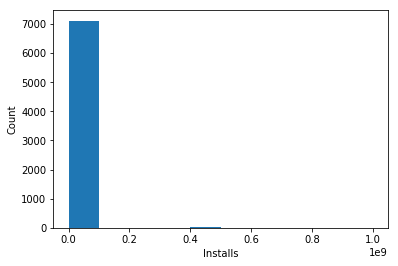

In [20]:
plt.xlabel('Installs')
plt.ylabel('Count')
rating_info = plt.hist(data['Installs'])

#### Install
This takes on an exponential distribution, with the mean number of installs being 9092723.418. The extreme right skewed distribution is evident because there are 6909 apps within the 5th percentile of installs while there are only 10 apps greater the 95th percentile of installs. This suggests that most apps get comparatively few installs while only a handful get huge numbers of installs. This also that there are outliers in this plot. We can see that a few of the downloaded apps are outliers because they are much larger than 100000000. 


In [21]:
## Make dictionary where key is the app's category, value is the dataframe containing only that category ##
categories = data.Category.unique()
dict_of_categories = {}
for i in categories:
    dict_of_categories['%s' % i] = None
    mask = data['Category'] == i
    cat_vals = data[mask]
    dict_of_categories['%s' % i] = cat_vals

## Get average rating of app for each category ##
avg_ratings = []
for df in dict_of_categories.values():
    mean = df["Rating"].mean()
    
    avg_ratings.append(mean)

iter_dict = {}
for each in range(0,len(dict_of_categories)-1):
    iter_dict[each] = each
    
## Replace NaN values in the 'Rating' column with the average rating for each category of app ##
filled_in_dict= {}
for (k,v),(k2,v2) in zip(dict_of_categories.items(), iter_dict.items()):
    v = v.fillna(avg_ratings[v2])
    filled_in_dict[k]= v

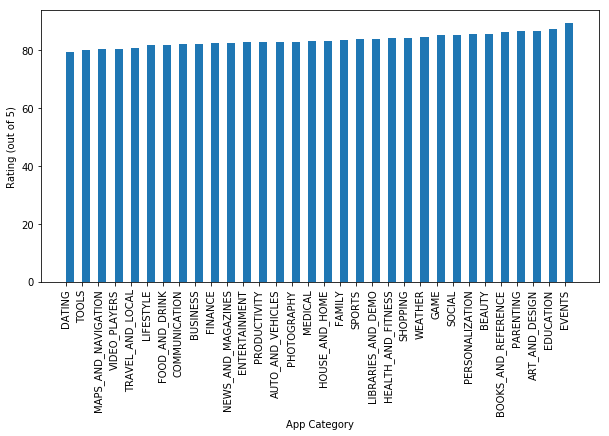

In [22]:
## Graph average ratings for each category of app ###    
## Create rating_dict, where keys are app categories and values are the categorys' average rating ##
## TODO STDEV bars ##
rating_dict = {}

for key, value in filled_in_dict.items():
    rating_dict[key] = value["Rating"].mean()

sorted_rating = {k: v for k, v in sorted(rating_dict.items(), key=lambda x: x[1])} # sort ratings

## make figure ##

plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
plt.xlabel ('App Category')
plt.ylabel ('Rating (out of 5)')
plt.bar(sorted_rating.keys(), sorted_rating.values(),align='edge', width=0.5)
plt.show()

#### Category vs Rating
From the lowest rated app category to the highest rated app category, success levels increase linearly and slightly. While the events category shows an increased bump in rating, this visualization shows that an app’s rating is not necessarily tied to its success (defined as number of installs) since the relationship here seems to be less significant than the exponential relationship for Category vs Success. 



### Category towards whole data

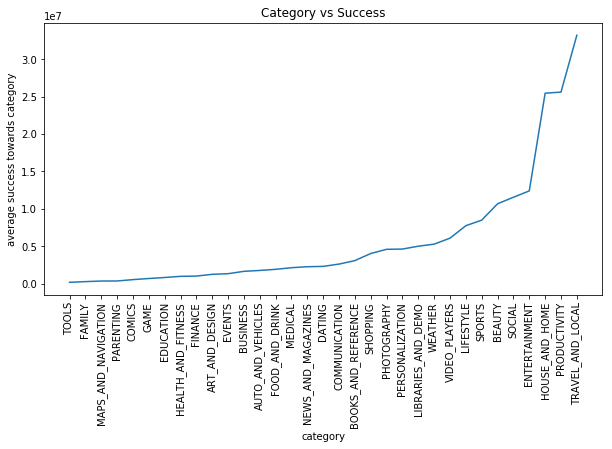

In [23]:
cate_successArray = data.groupby(['CateNum'])['Success'].mean()
cate_successDict = defaultdict(int)
for i in range(len(categories)):
    cate_successDict[categories[i]] = cate_successArray[i]

sorted_cate_success = {k: v for k, v in sorted(cate_successDict.items(), key=lambda x: x[1])} # sort ratings
plt.figure(figsize=(10, 5))
ax = plt.axes()
plt.plot(sorted_cate_success.keys(), sorted_cate_success.values())
plt.title("Category vs Success")
plt.xticks(rotation = 90)
plt.xlabel ('category')
plt.ylabel('average success towards category')
plt.show()

#### Category vs Success 
From the least successful app category (tools) to the most successful app category (travel and local), success levels increase exponentially. This demonstrates drastic differences in success depending on the category of the app. 


### Finding the Highest and Lowest Rated App Categories

In [24]:
rating_by_category = data.groupby(['Category']).mean()
max_rating = rating_by_category["Rating"].max()
min_rating = rating_by_category["Rating"].min()
avg_rating = rating_by_category["Rating"].mean()

print("On average, no app category got rated higher than " + str(max_rating) + " or lower than " + str(min_rating) + "." + "\n")
print("The average rating of apps across all categories is " + str(avg_rating) + "." + "\n")

highest_rated = rating_by_category[rating_by_category['Rating'] == max_rating].index[0]
lowest_rated = rating_by_category[rating_by_category['Rating'] == min_rating].index[0]

print("The highest average rated app category is " + highest_rated + ", and the lowest average rated category is "
      + lowest_rated + '.' + "\n")

On average, no app category got rated higher than 89.57894736842105 or lower than 79.36842105263158.

The average rating of apps across all categories is 83.6432603009724.

The highest average rated app category is EVENTS, and the lowest average rated category is DATING.



### The Installs of Apps

The average number of installs for an app is 9092723.417622378.

There are 6909 apps within the 5th percentile of installs.

There are 10 apps greater the 95th percentile of installs.



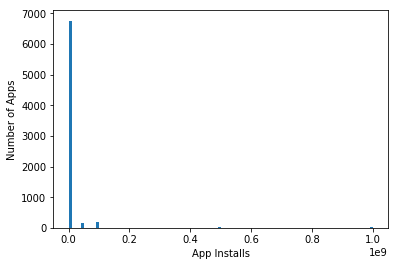

In [25]:
installs = data['Installs']
num_apps = len(installs)
avg_installs = np.mean(installs)
print("The average number of installs for an app is " + str(avg_installs) + "." + '\n')

plt.xlabel ('App Installs')
plt.ylabel ('Number of Apps')
bin_info = plt.hist(installs, bins = 100)
num_in_bins = bin_info[0]
installs_in_bins = bin_info[1]

num_apps_5 = sum(num_in_bins[0:5])
print("There are " + str(int(num_apps_5)) + " apps within the 5th percentile of installs." + '\n')

num_apps_95 = sum(num_in_bins[95:100])
print("There are " + str(int(num_apps_95)) + " apps greater the 95th percentile of installs." + '\n')

## Three dataframes based on success:
df_success

df_medium

df_bottom

### Category

In [26]:
def visualize_cate(data):
    fig = plt.figure(figsize=(10, 6))
    data_Cat = data['Category'].value_counts()
    data_Cat.plot('bar')
    f1 = plt.gcf()

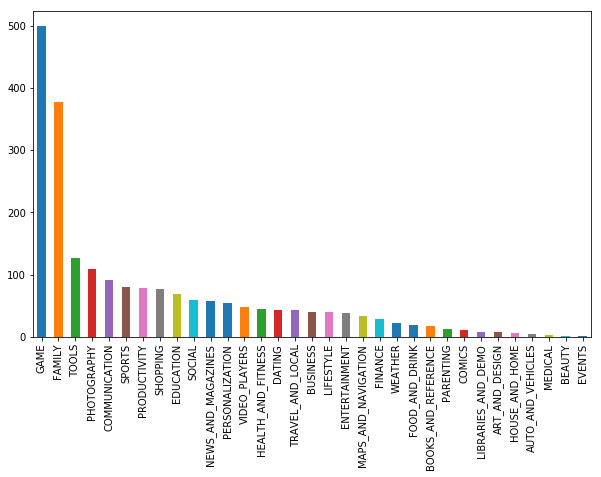

In [27]:
visualize_cate(df_success)


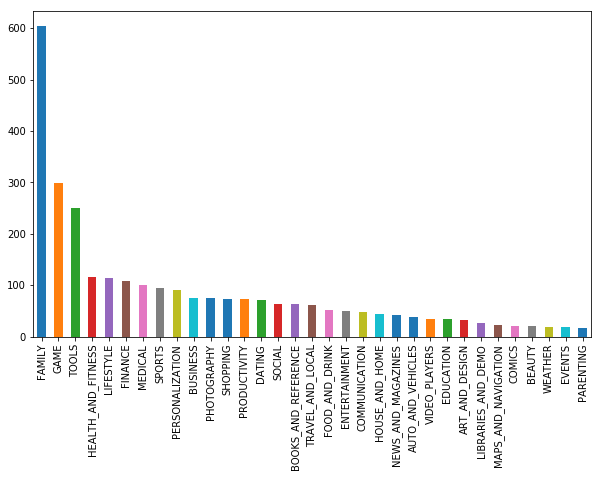

In [28]:
visualize_cate(df_medium)

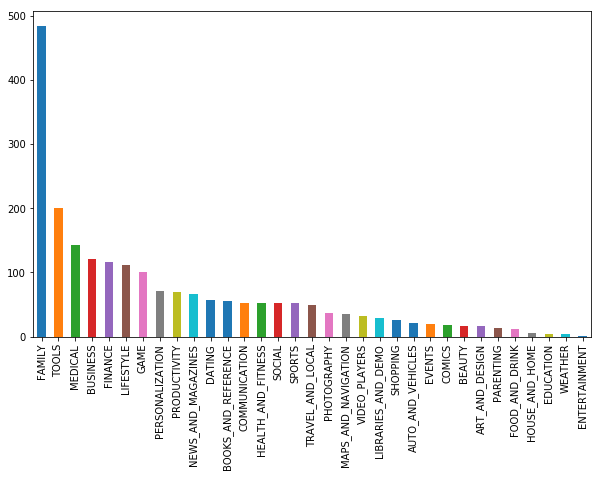

In [29]:
visualize_cate(df_bottom)

#### Success across Categories in the Top 30%, Middle 40%, and Bottom 30% of Apps
This takes on an exponential distribution with “Game” apps being the most prevalent in the top 30% of apps and “Family” apps being the most prevalent in the remaining 70% of apps. The least prevalent apps varied across all three categories: “Events,” “Parenting,” and “Entertainment” apps were the least prevalent in the top 30%, middle 40%, and bottom 30% of apps, respectively.


### Rating

In [30]:
def visualize_rating(data):
    fig = plt.figure(figsize=(10, 6))
    data_plot=data['Rating']
    n, bins, patches = plt.hist(data_plot)
    plt.xlabel(' Rating ')
    plt.ylabel('# Counts')

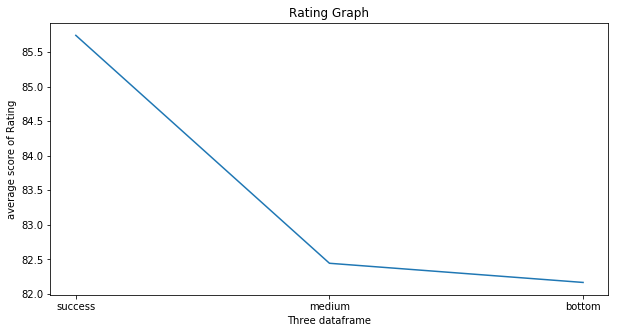

In [31]:
rating_dict = defaultdict(float)
rating_dict["success"] = statistics.mean(df_success['Rating']) 
rating_dict["medium"] = statistics.mean(df_medium['Rating']) 
rating_dict["bottom"] = statistics.mean(df_bottom['Rating'])

plt.figure(figsize=(10, 5))
ax = plt.axes()
plt.plot(rating_dict.keys(), rating_dict.values())
plt.title("Rating Graph")
plt.xlabel ('Three dataframe')
plt.ylabel('average score of Rating')
plt.show()

#### Average Rating vs Three Success Categories
The average rating of the three categories appears to be exponentially distributed with top 30% of successful apps being more highly rated than the remaining 70% of apps. There is an extremely small difference in the average rating of an app in the middle 40% of successful apps and the bottom 30% of successful apps.

### Size

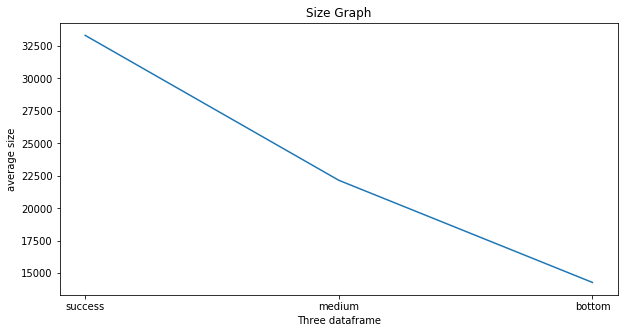

In [32]:
size_dict = defaultdict(float)
size_dict["success"] = statistics.mean(df_success['Size']) 
size_dict["medium"] = statistics.mean(df_medium['Size']) 
size_dict["bottom"] = statistics.mean(df_bottom['Size'])

plt.figure(figsize=(10, 5))
ax = plt.axes()
plt.plot(size_dict.keys(), size_dict.values())
plt.title("Size Graph")
plt.xlabel ('Three dataframe')
plt.ylabel('average size')
plt.show()

#### Average Size vs Three Success Categories
There seems to be a positive correlation between the average size of an app and the app’s success category (more successful category = larger app).


### Review

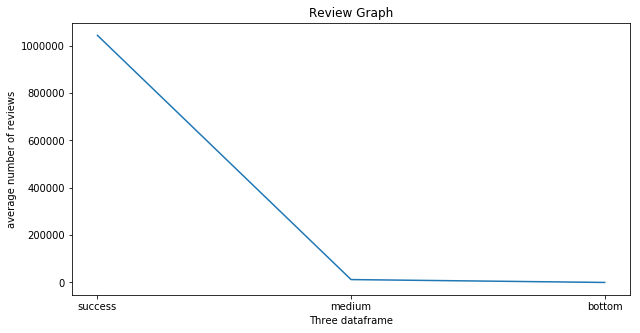

In [33]:
review_dict = defaultdict(float)
review_dict["success"] = statistics.mean(df_success['Reviews']) 
review_dict["medium"] = statistics.mean(df_medium['Reviews']) 
review_dict["bottom"] = statistics.mean(df_bottom['Reviews'])

plt.figure(figsize=(10, 5))
ax = plt.axes()
plt.plot(review_dict.keys(), review_dict.values())
plt.title("Review Graph")
plt.xlabel ('Three dataframe')
plt.ylabel('average number of reviews')
plt.show()

#### Average Number of Reviews vs Three Success Categories
This is very similar to average rating, and the average number of reviews of the three categories appears to be exponentially distributed with top 30% of successful apps being more reviewed than the remaining 70% of apps. There is an extremely small difference in the average number of reviews of an app in the middle 40% of successful apps and the bottom 30% of successful apps.



In [34]:
outcome, predictors = patsy.dmatrices('SuccessLevel~Size+Reviews+Rating', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           SuccessLevel   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     341.4
Date:                Mon, 10 Jun 2019   Prob (F-statistic):          3.59e-207
Time:                        17:08:41   Log-Likelihood:                -7840.4
No. Observations:                7150   AIC:                         1.569e+04
Df Residuals:                    7146   BIC:                         1.572e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7819      0.067     41.788      0.0

#### Linear Regression using an App’s Size, Number of Reviews, and Rating to Predict its SuccessLevel
the “Size”, “Reviews”, and “Rating” features are all significant predictors of “SuccessLevel” with p-values of less than 0.05. We used linear regression to find a continuous label for an app which we then converted to a categorical value for our three success categories.



In [35]:
# build the X and y based on the related features we got before
feature_names = ['Rating', 'Reviews', 'CateNum', 'Size']
X = data[feature_names]
y = data['SuccessLevel']

#randomly divide data into training and test set(4:1)
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0,stratify=y)

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  
    title = 'Normalized confusion matrix'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    df_cm = pd.DataFrame(cm, index = [i for i in "123"],
                  columns = [i for i in "123"])
    plt.figure(figsize = (3,3))
    sn.heatmap(df_cm, annot=True)
    plt.show()

#### Normalized Confusion Matrix
The diagonal elements (starting from the top left going down to bottom right) in this confusion matrix represent instances in which the prediction matches the ground truth. Off-diagonal elements are misclassifications. The ground truth label is on the y-axis, and the predicted label is on the x-axis. We use confusion matrices as well for all subsequent classifiers. It is useful since it shows which categories are being classified correctly as well as which ones are being misclassified.



## SVM

Accuracy of SVM on training set is  0.9984265734265734
Accuracy of SVM on test set is  0.4489510489510489
-----Here is the result of SVM on training set-----
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1716
          2       1.00      1.00      1.00      2288
          3       1.00      1.00      1.00      1716

avg / total       1.00      1.00      1.00      5720

-----Here is the result of SVM on test set-----
             precision    recall  f1-score   support

          1       0.98      0.13      0.23       429
          2       0.42      1.00      0.59       572
          3       0.94      0.03      0.07       429

avg / total       0.74      0.45      0.33      1430



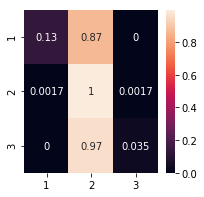

In [37]:

svm = SVC()  
svm = svm.fit(X_train, y_train)  
print('Accuracy of SVM on training set is ', svm.score(X_train, y_train))
print('Accuracy of SVM on test set is ', svm.score(X_test, y_test))

predictions_train_svm = svm.predict(X_train)
predictions_test_svm = svm.predict(X_test)

print("-----Here is the result of SVM on training set-----")
print(classification_report(y_train,predictions_train_svm))
print("-----Here is the result of SVM on test set-----")
print(classification_report(y_test,predictions_test_svm))


y_test = np.array(y_test)
y_test = np.reshape(y_test,(1430,1))
predictions_test_svm = np.reshape(predictions_test_svm,(1430,1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_svm, classes=[1,2,3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Decision Tree

Accuracy of Decision Tree on training set is  0.9987762237762238
Accuracy of Decision Tree on test set is  0.8048951048951049
-----Here is the result of Decision Tree on training set-----
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1716
          2       1.00      1.00      1.00      2288
          3       1.00      1.00      1.00      1716

avg / total       1.00      1.00      1.00      5720

-----Here is the result of Decision Tree on test set-----
             precision    recall  f1-score   support

          1       0.81      0.81      0.81       429
          2       0.75      0.76      0.76       572
          3       0.87      0.86      0.86       429

avg / total       0.81      0.80      0.81      1430



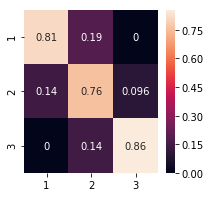

In [38]:
decisionTree = DecisionTreeClassifier()
classiferDT = decisionTree.fit(X_train, y_train)
print('Accuracy of Decision Tree on training set is ', classiferDT.score(X_train, y_train))
print('Accuracy of Decision Tree on test set is ', classiferDT.score(X_test, y_test))

predictions_train_dt = classiferDT.predict(X_train)
predictions_test_dt = classiferDT.predict(X_test)

print("-----Here is the result of Decision Tree on training set-----")
print(classification_report(y_train,predictions_train_dt))
print("-----Here is the result of Decision Tree on test set-----")
print(classification_report(y_test,predictions_test_dt))



y_test = np.array(y_test)
y_test = np.reshape(y_test,(1430,1))
predictions_test_dt = np.reshape(predictions_test_dt,(1430,1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_dt, classes=[1,2,3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

the classifer has overfitting problem.

## KNN

Accuracy of K-nearest neighbor on training set is  0.8692307692307693
Accuracy of K-nearest neighbor on test set is  0.8202797202797203
-----Here is the result of KNN on training set-----
             precision    recall  f1-score   support

          1       0.88      0.87      0.88      1716
          2       0.84      0.83      0.84      2288
          3       0.89      0.92      0.91      1716

avg / total       0.87      0.87      0.87      5720

-----Here is the result of KNN on test set-----
             precision    recall  f1-score   support

          1       0.84      0.83      0.83       429
          2       0.78      0.76      0.77       572
          3       0.85      0.89      0.87       429

avg / total       0.82      0.82      0.82      1430



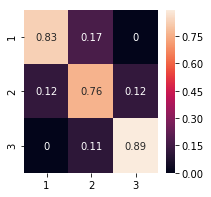

In [39]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
print('Accuracy of K-nearest neighbor on training set is ', kNN.score(X_train, y_train))
print('Accuracy of K-nearest neighbor on test set is ', kNN.score(X_test, y_test))

predictions_train_knn = kNN.predict(X_train)
predictions_test_knn = kNN.predict(X_test)

print("-----Here is the result of KNN on training set-----")
print(classification_report(y_train,predictions_train_knn))
print("-----Here is the result of KNN on test set-----")
print(classification_report(y_test,predictions_test_knn))

y_test = np.array(y_test)
y_test = np.reshape(y_test,(1430,1))
predictions_test_knn = np.reshape(predictions_test_knn,(1430,1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_knn, classes=[1,2,3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## softmax

Accuracy of softmax on training set is  0.8337412587412587
Accuracy of softmax on test set is  0.8426573426573427
-----Here is the result of softmax on training set-----
             precision    recall  f1-score   support

          1       0.88      0.76      0.82      1716
          2       0.78      0.81      0.80      2288
          3       0.86      0.94      0.90      1716

avg / total       0.84      0.83      0.83      5720

-----Here is the result of softmax on test set-----
             precision    recall  f1-score   support

          1       0.90      0.78      0.84       429
          2       0.80      0.82      0.81       572
          3       0.86      0.94      0.90       429

avg / total       0.84      0.84      0.84      1430



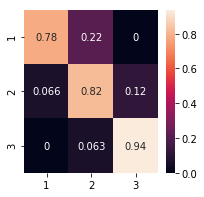

In [40]:

softmax = LogisticRegression()
softmax.fit(X_train, y_train)
print('Accuracy of softmax on training set is ', softmax.score(X_train, y_train))
print('Accuracy of softmax on test set is ', softmax.score(X_test, y_test))

predictions_train_softmax = softmax.predict(X_train)
predictions_test_softmax = softmax.predict(X_test)

print("-----Here is the result of softmax on training set-----")
print(classification_report(y_train,predictions_train_softmax))
print("-----Here is the result of softmax on test set-----")
print(classification_report(y_test,predictions_test_softmax))

y_test = np.array(y_test)
y_test = np.reshape(y_test,(1430,1))
predictions_test_softmax = np.reshape(predictions_test_softmax,(1430,1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_softmax, classes=[1,2,3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## RandomForestClassifier

Accuracy of RFC on training set is  0.9875874125874126
Accuracy of RFC on test set is  0.8412587412587412
-----Here is the result of RFC on training set-----
             precision    recall  f1-score   support

          1       0.98      0.99      0.99      1716
          2       0.98      0.99      0.98      2288
          3       1.00      0.99      0.99      1716

avg / total       0.99      0.99      0.99      5720

-----Here is the result of RFC on test set-----
             precision    recall  f1-score   support

          1       0.84      0.88      0.86       429
          2       0.80      0.80      0.80       572
          3       0.89      0.86      0.88       429

avg / total       0.84      0.84      0.84      1430



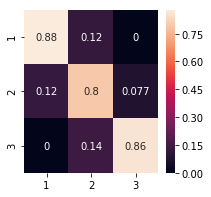

In [41]:

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print('Accuracy of RFC on training set is ', RFC.score(X_train, y_train))
print('Accuracy of RFC on test set is ', RFC.score(X_test, y_test))

predictions_train_RFC = RFC.predict(X_train)
predictions_test_RFC = RFC.predict(X_test)

print("-----Here is the result of RFC on training set-----")
print(classification_report(y_train,predictions_train_RFC))
print("-----Here is the result of RFC on test set-----")
print(classification_report(y_test,predictions_test_RFC))

y_test = np.array(y_test)
y_test = np.reshape(y_test,(1430,1))
predictions_test_RFC = np.reshape(predictions_test_RFC,(1430,1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions_test_RFC, classes=[1,2,3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Summary of Classifiers:

<div>Random Forest: training accuracy: 0.989, testing accuracy: 0.845</div>
<div>k-Nearest Neighbors: training accuracy: 0.869, testing accuracy: 0.820</div>
<div>Logistic Regression (Softmax): training accuracy: 0.843, testing accuracy: 0.834</div>
    <div>Support Vector Machine: training accuracy: 0.998, testing accuracy: 0.449</div>
<div>Decision Tree: training accuracy: 0.999, testing accuracy: 0.795</div>


## Ethics & Privacy

We handled possible privacy and ethics issues by first verifying that the Google Playstore dataset was free to use for the public. We also looked at the dataset itself to ensure that the different app categories were fairly represented  in the dataset. We do have permission to use the dataset Google Play Store app, which we found on Kaggle. Kaggle is an online community that allows users to find and use public data sets; furthermore, our purpose is nonmalignant as we are using this dataset for the purpose of data exploration rather than for self profit or privacy invasion. We do not believe there are any concerns about privacy or terms of use regarding our use of the Google Play Store app dataset. Our questions do not intend to infringe on anyone’s privacy, and our datasets do not contain any information not already available to the public. Thus, we do not believe there are any issues regarding anyone’s privacy in play.


We do not believe the Google Play Store app dataset is biased in terms of who and how it was composed. The apps in the dataset are representative of a large range of installs, reviews, byte size, etc. The apps also represent a wide range of categories. We believe this data was scraped from the internet rather than cherry-picked; however, the data afforded to us influences how we define a “successful” app, which is by the number of installs. Though, this is more a bias regarding how we analysts see success rather than the fault of those who composed the dataset and how the data was composed. This is a difficult bias to handle since any method we choose to define “success” will have some confounding variables. Still, app developers and app data analysts seem to agree that app downloads are a critical indicator for success. As app popularity increases, so does the total number of downloads and “Apps can’t succeed without downloads” (https://buildfire.com/app-statistics/).

Additionally, younger generations have long been the more prominent users of technology such as smartphones, but “there has also been significant growth in tech adoption in recent years among older generations” (Pew Research Center). Therefore, a potential bias in the long term application of our project could be that the data was collected now, when the majority of users of apps are younger generations; and this means that the desires/needs of older generations could not be equally factored in to our analysis. However, the data is currently relevant as it accurately reflects our target population of application users. 



#### References:

https://www.pewresearch.org/fact-tank/2018/05/02/millennials-stand-out-for-their-technology-use-but-older-generations-also-embrace-digital-life/
https://buildfire.com/app-statistics/


## Conclusion & Discussion

Our data analysis entailed describing the distribution of our variables byte size, rating, category, and number of reviews while also finding possible correlations between them. We also analyzed trends of these features across all app categories. Most of our distributions of features tend to be skewed normal distributions or exponential. The most successful apps tend to have more reviews and are more highly rated while the bottom 70% of apps have quite fewer ratings and are less highly rated, showing an exponential relationship between “SuccessLevel” and “reviews” and “rating”. The relationship between “SuccessLevel” and “Size” was quite linear: as size increases, so does success level.

We attempted to classify apps with different classifiers using the feature “SuccessLevel” as the label, including SVM, Decision Tree, K-Nearest Neighbors, Softmax, and Random Forest. Based on the analysis section, we picked rating, number of reviews, category and the size of application as features to categorize apps. Based on the default parameters of the above classifiers, Softmax shows the best classification performance with a testing accuracy 84.27% that is comparable to its training accuracy 83.37%. Even though Random Forest has a slightly higher testing accuracy than Softmax, Random Forest appears to be more overfitted. k-Nearest Neighbors overfits as well, but it is less overfit than the Support Vector Machine and Decision Tree, which show large discrepancies between the training and test accuracies.

One limitation of our project includes the fact that we are only analyzing free applications. It is important to note that this analysis applies only to free apps and indicators of a successful app could change if paid apps are analyzed instead. This doesn’t take into account the entire population, seeing that there are groups of people who will spend money on apps. We decided to use free applications because a strong majority of apps, and the most revenue, comes from free applications. Additionally, the dataset that we are using only collected data from younger users, but there has been significant growth in people from later generations using smartphones. Therefore, our dataset and analysis is slightly biased towards the current generation of smartphone users. Our findings can currently serve as a resource for app developers who wish to increase the likelihood of creating a highly successful app.